# CROP PRODUCTION ANALYSIS  OF INDIA USING PYTHON

In [132]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import plotly.express as px
from warnings import filterwarnings
filterwarnings(action='ignore')

In [133]:
#Reading Dataset
cp=pd.read_csv(r"C:\unifield mentor\Crop Production data.csv")

In [134]:
#Head
cp.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [135]:
#Tail
cp.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [136]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [137]:
cp.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [138]:
cp.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [139]:
cp.shape

(246091, 7)

# CLEANING NULL VALUES FROM DATASET

In [140]:
cp.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [141]:
columns=list(cp)
columns

['State_Name',
 'District_Name',
 'Crop_Year',
 'Season',
 'Crop',
 'Area',
 'Production']

In [142]:
 (cp[columns[0:6]]==0).sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
dtype: int64

In [143]:
#drop rows with null values
cp.dropna(inplace=True)

In [144]:
cp

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [145]:
cp['State_Name'].value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                          954
P

In [146]:
cp['Season'].value_counts()

Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64

In [147]:
cp['Crop'].value_counts()

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

In [148]:
cp['Crop_Year'].value_counts()

2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64

# DATA VISUALIZATIONS 

# SEASONS

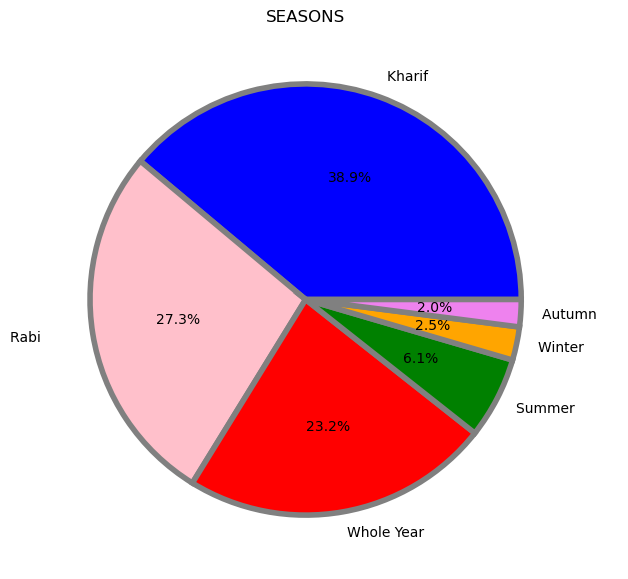

In [285]:
plt.figure(figsize=(7,7))
plt.pie(cp['Season'].value_counts(),labels=list(cp['Season'].value_counts().keys()),colors = ['blue','pink','red','green','orange','violet'],
        explode=(0,0,0,0,0,0),
        wedgeprops = {'linewidth' :4,'width':1,'edgecolor':'grey'},
        textprops={'fontsize':10},autopct='%1.1f%%')
plt.title('SEASONS')
plt.show()

#                                          TOP 10 STATES

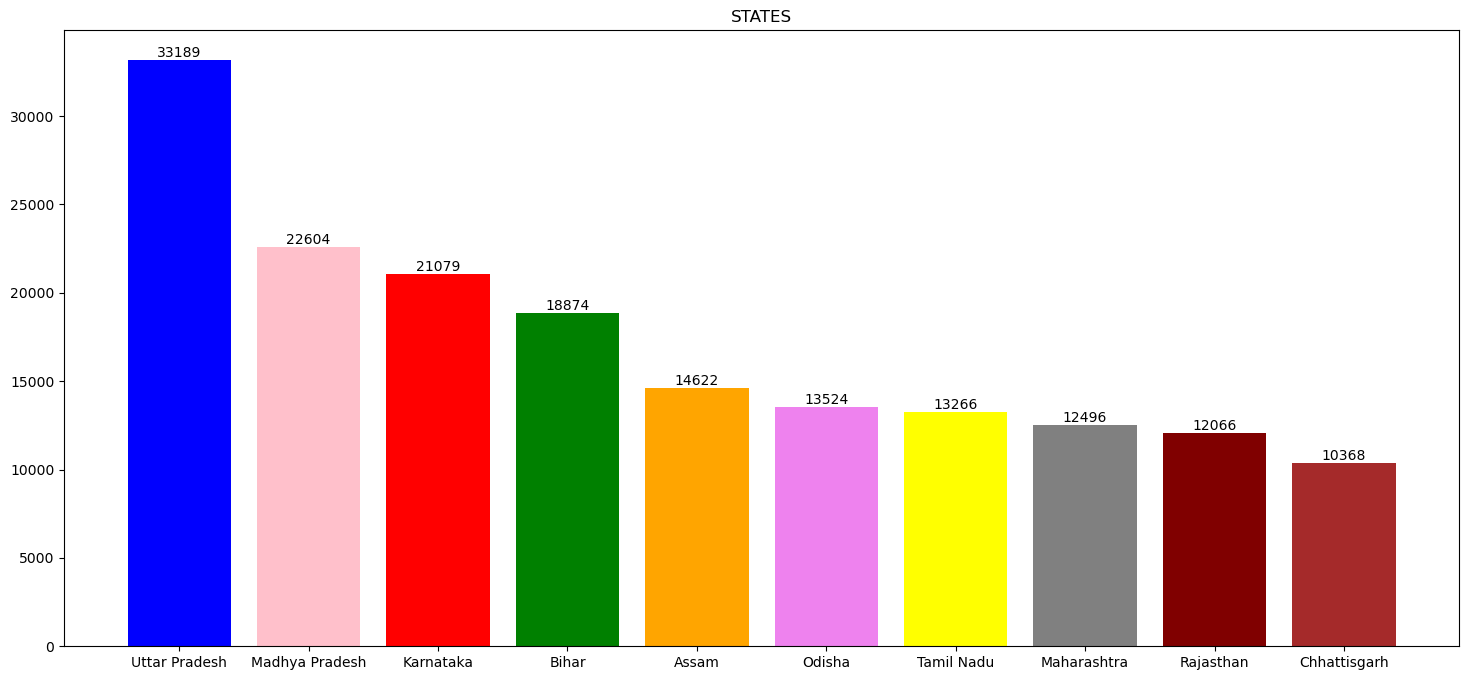

In [179]:
plt.figure(figsize=(18,8))
bars=plt.bar(list(cp['State_Name'].value_counts()[0:10].keys()),cp['State_Name'].value_counts()[0:10],color=['blue','pink','red','green','orange','violet','yellow','grey','maroon','brown'])
for bar in bars.patches:
    plt.annotate(str(bar.get_height()), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), 
                 ha='center', 
                 va='bottom')
plt.title('STATES')
plt.show()

# MOST CULTIVATED CROPS

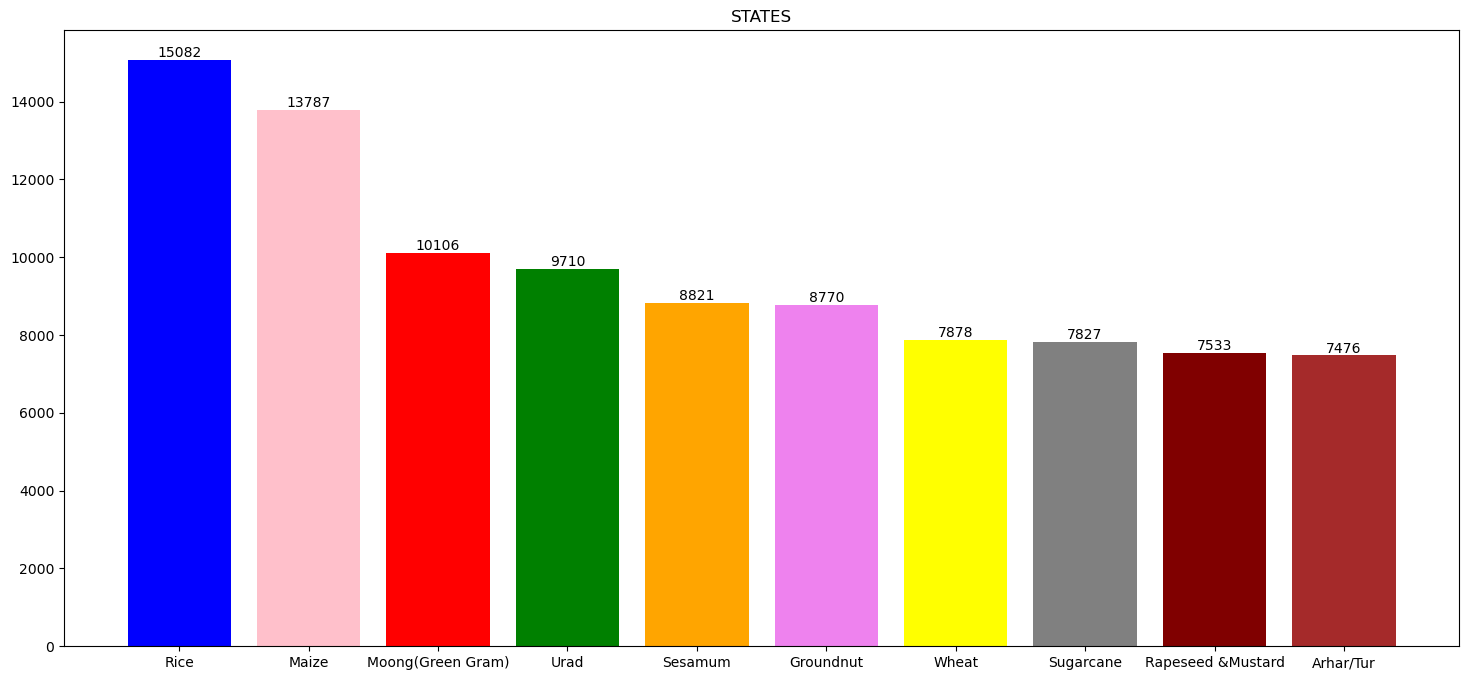

In [288]:
plt.figure(figsize=(18,8))
bars=plt.bar(list(cp['Crop'].value_counts()[0:10].keys()),cp['Crop'].value_counts()[0:10],color=['blue','pink','red','green','orange','violet','yellow','grey','maroon','brown'])
for bar in bars.patches:
    plt.annotate(str(bar.get_height()), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), 
                 ha='center', 
                 va='bottom')
plt.title('STATES')
plt.show()

# PRODUCTION BY STATES

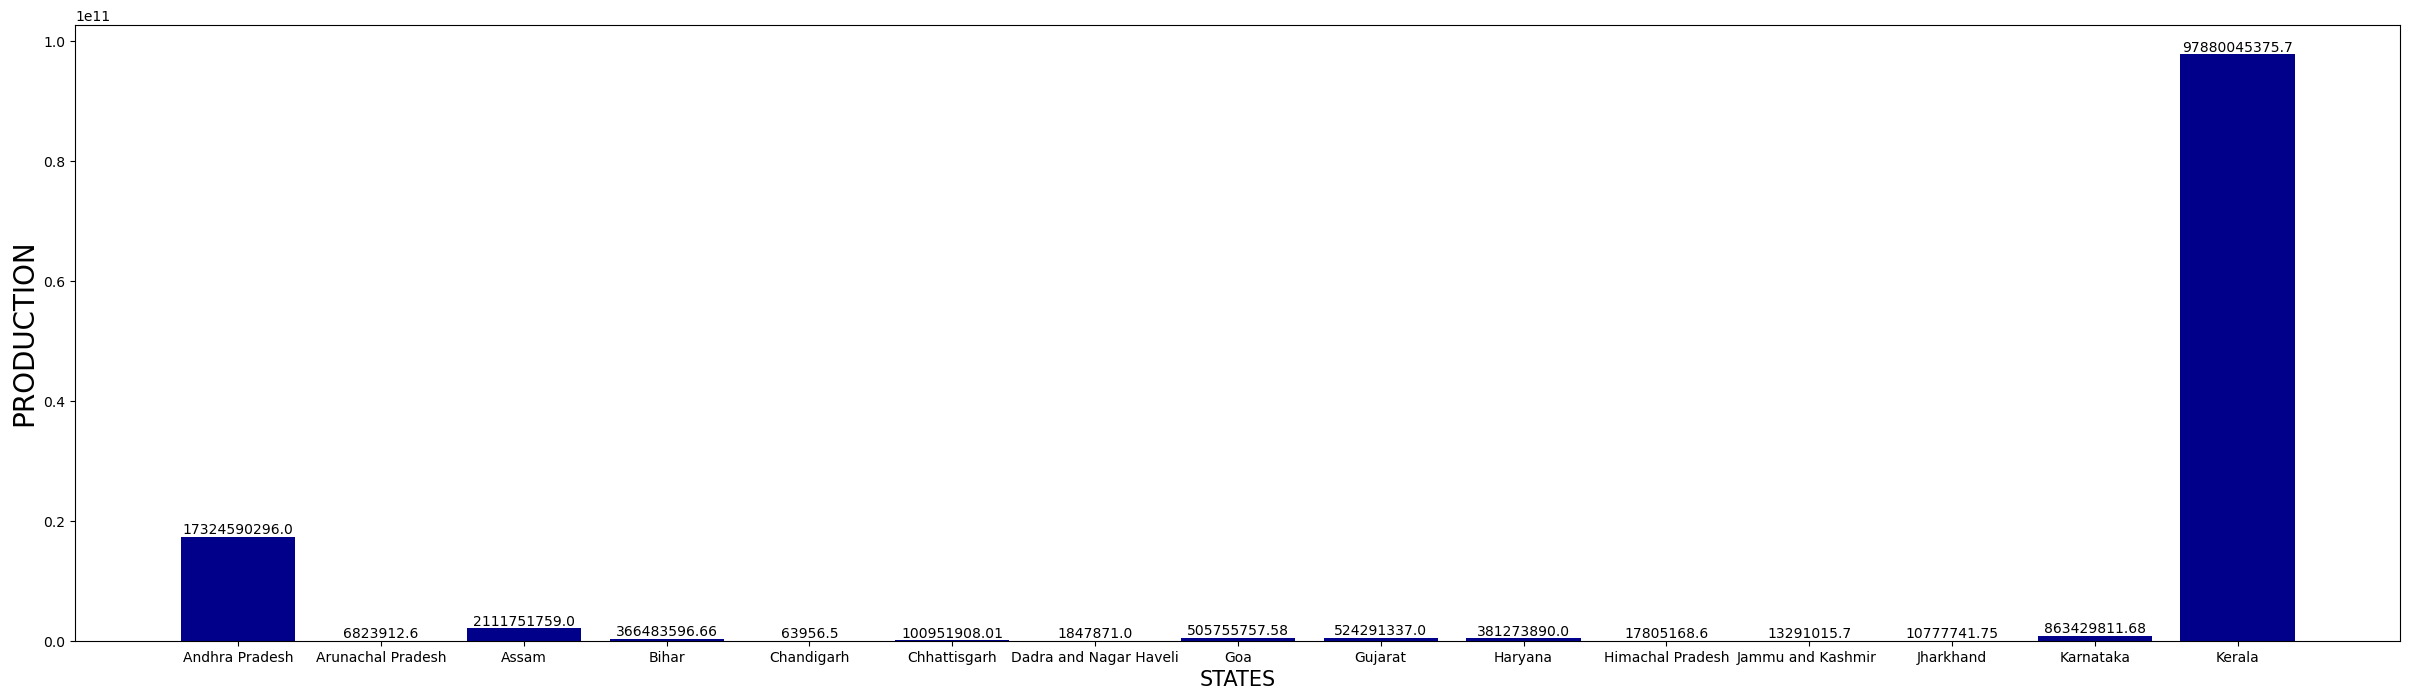

In [295]:
plt.figure(figsize=(30,8))
bars=plt.bar(list(cp.groupby('State_Name')['Production'].sum()[1:16].keys()),cp.groupby('State_Name')['Production'].sum()[1:16],color='darkblue')
for bar in bars.patches:
    plt.annotate(str(bar.get_height()), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), 
                 ha='center', 
                 va='bottom')
plt.xlabel('STATES',fontsize=15)
plt.ylabel('PRODUCTION',fontsize=20)
plt.show()


# PRODUCTION BY YEAR

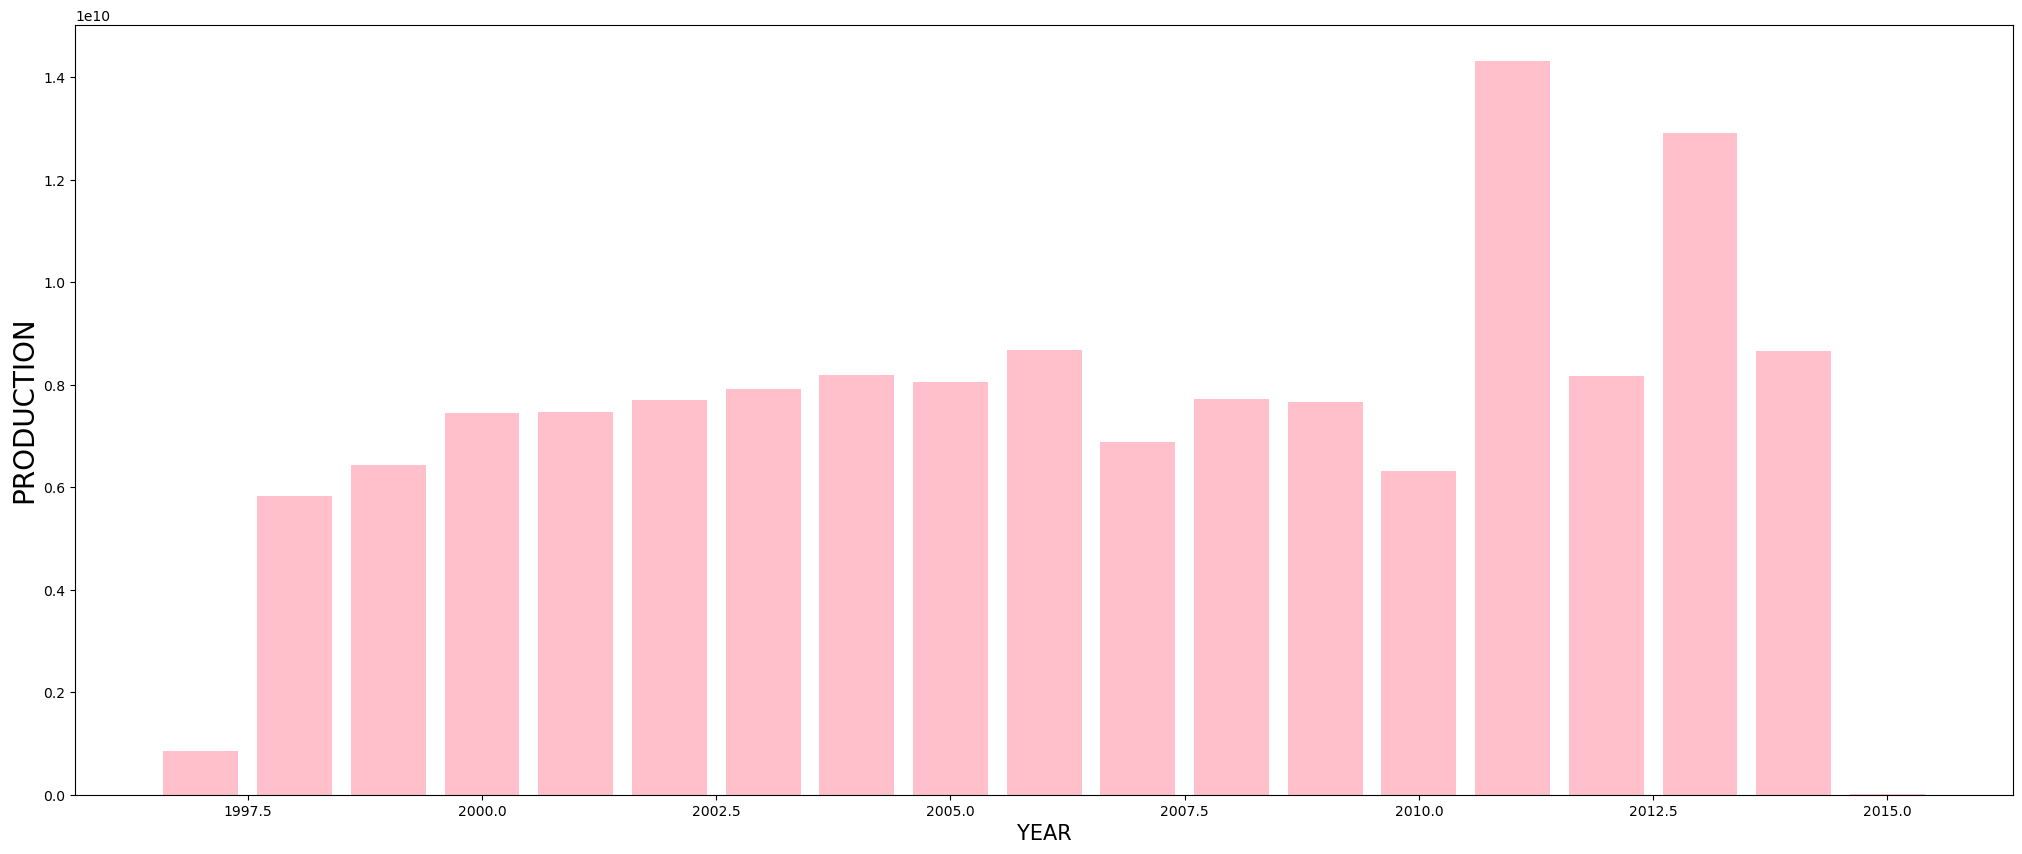

In [296]:
plt.figure(figsize=(25,10))
plt.bar(list(cp.groupby('Crop_Year')['Production'].sum()[0:20].keys()),cp.groupby('Crop_Year')['Production'].sum()[0:20],color='Pink')
plt.xlabel('YEAR',fontsize=15)
plt.ylabel('PRODUCTION',fontsize=20)
plt.show()

# PRODUCTION BY SEASON

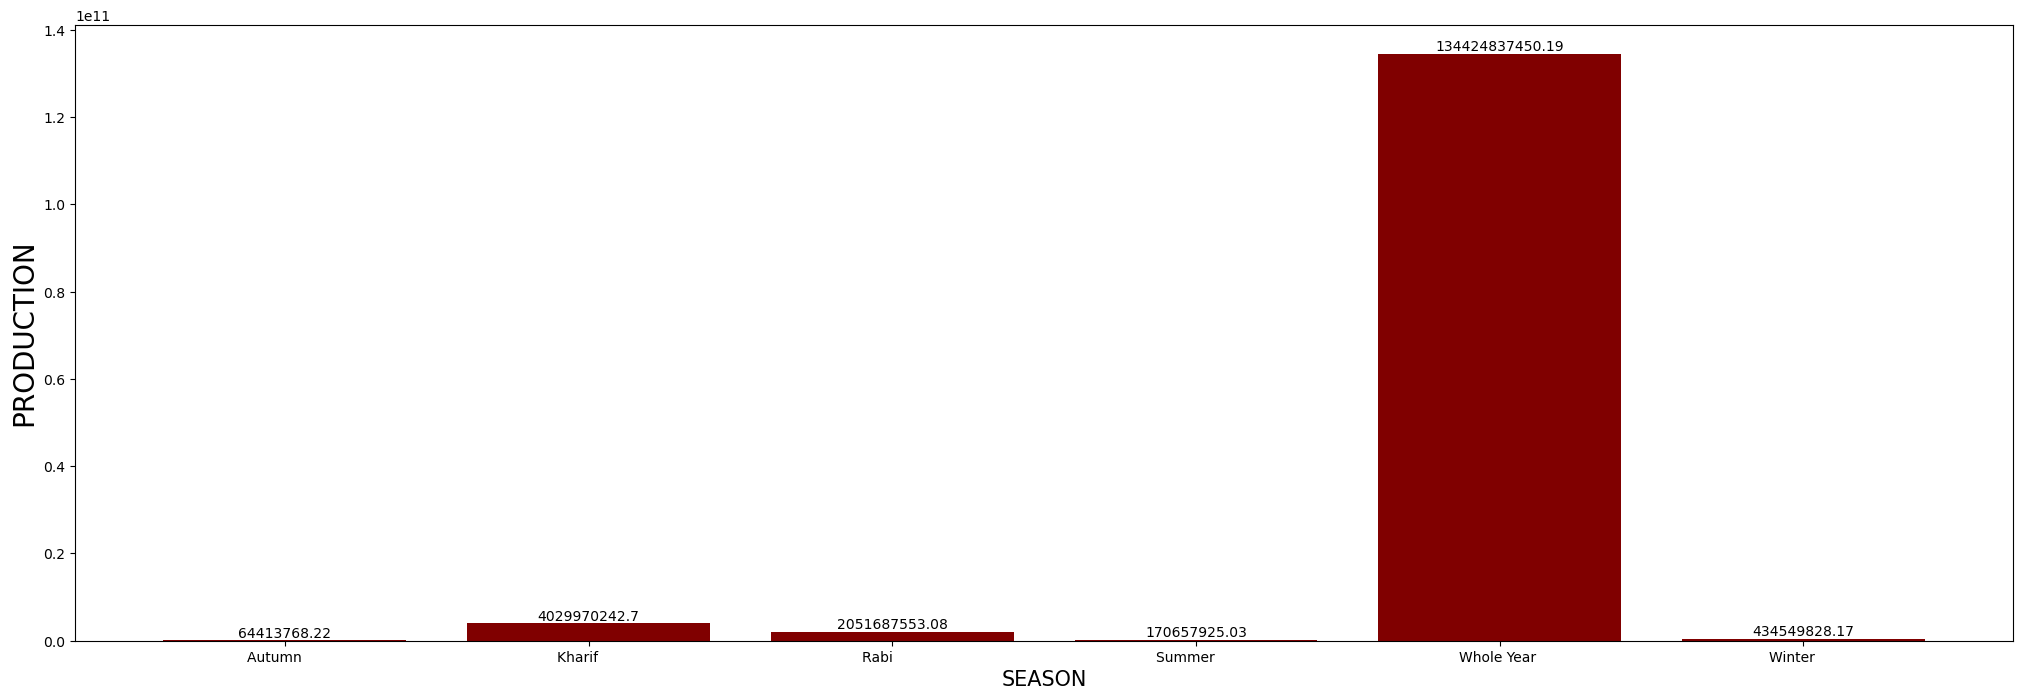

In [200]:
plt.figure(figsize=(25,8))
bars=plt.bar(cp.groupby('Season')['Production'].sum().keys(),cp.groupby('Season')['Production'].sum(),color='maroon')
for bar in bars.patches:
    plt.annotate(str(bar.get_height()), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), 
                 ha='center', 
                 va='bottom')
plt.xlabel('SEASON',fontsize=15)
plt.ylabel('PRODUCTION',fontsize=20)
plt.show()

In [276]:
df=cp.drop(columns=['State_Name','District_Name','Season','Crop'])

In [278]:
df.corr()

,Crop_Year,Area,Production
Crop_Year,1.000000,-0.025305,0.006989
Area,-0.025305,1.000000,0.040587
Production,0.006989,0.040587,1.000000


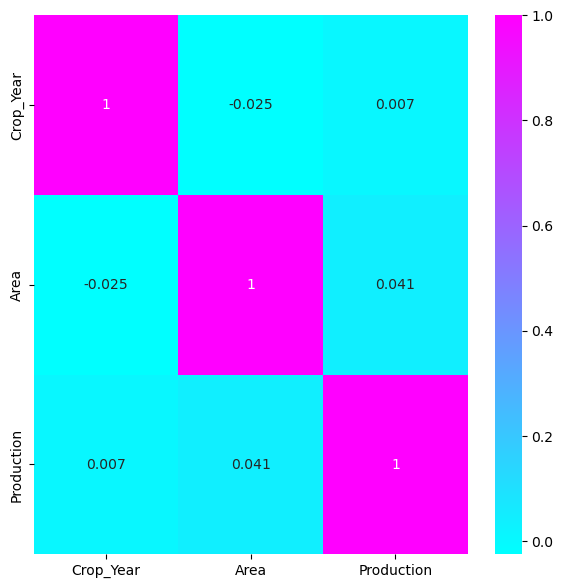

In [282]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),cmap='cool',annot=True)
plt.show()

# TRAINING AND TESTING

In [212]:
from sklearn.model_selection import train_test_split

In [259]:
predict='Production'
features=cp[['Crop_Year','Area','Production']]

In [260]:
x=np.array(features.drop([predict],1))
y=np.array(features[predict])

In [261]:
x

array([[2.00000e+03, 1.25400e+03],
       [2.00000e+03, 2.00000e+00],
       [2.00000e+03, 1.02000e+02],
       ...,
       [2.01400e+03, 3.24000e+02],
       [2.01400e+03, 2.79151e+05],
       [2.01400e+03, 1.75000e+02]])

In [262]:
y

array([2.00000e+03, 1.00000e+00, 3.21000e+02, ..., 1.62500e+04,
       5.97899e+05, 8.80000e+01])

In [263]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [264]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((48472, 2), (48472,), (193889, 2), (193889,))

# LINEAR REGRESSION

In [265]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [266]:
model.fit(x_train,y_train)

LinearRegression()

In [268]:
prediction=model.predict(x_test)

In [271]:
from sklearn.metrics import mean_absolute_error
model.score(x_test,prediction)

1.0